**This repository contains scripts for searching the ChEMBL database to extract and analyze bioactivity data for the CYP19A1 target (aromatase enzyme), which is implicated in Leydig cell steroidogenesis.** 💊

###Installation of necessary libraries

One of the key libraries required for this project is `chembl_webresource_client`.

ChEMBL database consists of molecules that have been biologically tested for their activity against a target organism or protein of interest. In our case, the focus is on CYP19A1. Each molecule included has undergone thorough biological evaluation to determine its potential as a bioactive compound, with particular emphasis on its effects on CYP19A1. This information is vital as it provides insights into the pharmacological profile of each compound and helps in the identification of promising therapeutic candidates.



In [ ]:
# Import libraries
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Search the ChEMBL database
import pandas as pd
from chembl_webresource_client.new_client import new_client
target=new_client.target
target_query=target.search('cyp19a1')
targets=pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,16.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116
1,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,15.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606


In [ ]:
# Select target ID
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1978'

### Standard type "IC50"
"IC50" refers to a commonly used measure in pharmacology to assess the potency of a substance in inhibiting a specific biological or biochemical function.
In the context of drug discovery, a lower IC50 value indicates a more potent inhibitor, as it requires a lower concentration to inhibit the target by half.

In [ ]:
# Initialize the activity service from ChEMBL web client
activity = new_client.activity

# Filter the activity data for the specified target ID and standard type 'IC50'
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

# Before converting the results to a DataFrame check if the result is not empty
if res:
    df = pd.DataFrame.from_dict(res)
    display(df)
else:
    # Inform if no results were found
    print('No activity data found for the specified target and standard type IC50')

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
df.to_csv('cyp19a1_activity.csv', index=False)

In [ ]:
! mkdir cyp19a1
! cp cyp19a1_activity.csv cyp19a1

In [ ]:
# Remove rows with NaN in 'standard_value' column
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


### Classifying compounds based on their activity level

The bioactivity information is measured in IC50 values.
Active: IC50 < 1000nm
Inactive: IC50 > 10,000 nM
As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.



In [ ]:
df2.loc[:,'standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')

# Categorizes each value in 'standard_value' column into a bioactivity class
# Add bioactivity_class as a new column
df2.loc[:,'bioactivity_class'] = df2['standard_value'].apply(lambda x: 'inactive' if x >= 10000 else ('active' if x <= 1000 else 'intermediate'))

# Display the updated DataFrame
df2

<ipython-input-9-1308fdb849a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')
<ipython-input-9-1308fdb849a0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:,'standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')
<ipython-input-9-1308fdb849a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1,intermediate
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0,inactive
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238,active
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057,active
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1,active
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0,inactive
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031,active
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042,active


In [ ]:
# Create new DataFrame - select important columns
selection=['molecule_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2961,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,50.1,active
2962,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0,inactive
2963,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0,active
2964,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,42.0,active


In [ ]:
# Save new DataFrame
df3.to_csv('cyp19a1_data_preprocessed.csv', index=False)
! cp cyp19a1_data_preprocessed.csv cyp19a1

### Installation of RDKit Library
RDKit is an open-source toolkit for cheminformatics and machine learning. It provides a wide range of tools for chemical informatics, including but not limited to molecular fingerprinting, chemical reaction analysis, and molecular descriptor computation. These functionalities are crucial for the analysis and manipulation of chemical data in drug discovery projects.

In [ ]:
# Install library
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 39.3 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries for molecular descriptor calculations
import numpy as np  # NumPy is used for handling numerical operations
from rdkit import Chem  # RDKit's Chem module provides classes and functions for chemical informatics
from rdkit.Chem import Descriptors, Lipinski  # Import Descriptors and Lipinski from RDKit for calculating molecular descriptors

### Lipinski's Rule of Five

It's a set of criteria developed by Christopher A. Lipinski to evaluate the druglikeness of a chemical compound.
The function I've provided calculates molecular descriptors that are relevant to assessing a compound's compliance with Lipinski's rule.
These descriptors include:
- **MW** molecular weight ( < 500 Dalton),
- **LogP** Octanol-water partition coefficient (a measure of lipophilicity) ( < 5),
- **NumHDonors** the number of hydrogen bond donors ( < 5),
- **NumHAcceptors** the number of hydrogen bond acceptors ( < 10)

By applying this function to a dataset of compounds represented by their SMILES notation, you can filter out those that are less likely to be orally active, streamlining the drug discovery process.It converts each SMILES string into a molecule object using RDKit, calculates the descriptors, and then compiles the results into a Pandas DataFrame.



In [ ]:
# Calculate molecular descriptors relevant to Lipinski's Rule of Five
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        if mol is not None:
            moldata.append(mol)
        elif verbose:
            print(f"Warning: SMILES '{elem}' could not be converted to a molecule.")

    # Check if moldata is empty
    if not moldata:
        print("No valid molecules were found.")
        return pd.DataFrame(columns=["MW", "LogP", "NumHDonors", "NumHAcceptors"])

    baseData = []
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = [desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors]
        baseData.append(row)

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(baseData, columns=columnNames)

    return descriptors

In [ ]:
df4 = pd.read_csv('cyp19a1_data_preprocessed.csv')
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2,2
1,315.501,3.89810,2,2
2,412.306,5.70542,0,3
3,319.383,4.63450,0,3
4,321.811,4.58780,0,3
...,...,...,...,...
2885,296.410,4.02950,0,2
2886,373.416,3.11580,2,5
2887,369.446,3.85650,1,7
2888,299.355,2.40130,1,5


In [ ]:
# Combine two DataFrames into one
df_combined = pd.concat([df4, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2,2
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2,2
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0,3
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0,3
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0,3
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,50.1,active,296.410,4.02950,0,2
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0,inactive,373.416,3.11580,2,5
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0,active,369.446,3.85650,1,7
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,42.0,active,299.355,2.40130,1,5


In [ ]:
df_combined.standard_value.describe()

count    2.890000e+03
mean     2.173576e+10
std      7.235369e+11
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      7.370000e+03
max      3.388442e+13
Name: standard_value, dtype: float64

#### Normalize the 'standard_value' in the DataFrame
This function limits the 'standard_value' to a maximum of 100,000,000 to avoid negative values when converting to logarithmic scale later in analysis. It then replaces the original 'standard_value' column with the normalized values and removes the original column to streamline the dataset for further analysis.

In [ ]:
def norm_value(input_df):
    # Value limited to 100 000 000, otherwise the negative logarithmic value will become negative
    input_df['standard_value_norm'] = input_df['standard_value'].clip(upper=100000000)
    # Delete 'standard_value' column
    input_df.drop('standard_value', axis=1, inplace=True)

    return input_df

In [ ]:
df_norm=norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2,2,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2,2,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0,3,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0,3,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0,3,54.0
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0,2,50.1
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2,5,10000.0
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1,7,31.0
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,active,299.355,2.40130,1,5,42.0


### Convert IC50 values from nanomolar (nM) to molar (M) units and calculate the pIC50 values

The function first ensures all IC50 values are numeric and sets any negative values to a minimum of 1 to avoid undefined logarithmic calculations. It then converts these normalized IC50 values to molar units and calculates their pIC50, which is the negative log base 10 of the IC50 in molar units. This transformationis useful for bioactivity data analysis, making it easier to handle and interpret the data. The original normalized IC50 values are then removed from the DataFrame, leaving only the pIC50 values.

In [ ]:
def convert_to_pIC50(df):
    # Ensure all IC50 values are numeric and non-negative
    df['standard_value_norm'] = pd.to_numeric(df['standard_value_norm'], errors='coerce').clip(lower=1)

    # Convert nM to M, and then calculate pIC50
    df['pIC50'] = -np.log10(df['standard_value_norm'] * (10**-9))

    # Drop the original 'standard_value_norm' column
    df.drop('standard_value_norm', axis=1, inplace=True)

    return df

In [ ]:
df_final=convert_to_pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2,2,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2,2,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0,3,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0,3,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0,3,7.267606
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0,2,7.300162
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2,5,5.000000
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1,7,7.508638
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,active,299.355,2.40130,1,5,7.376751


In [ ]:
df_final.pIC50.describe()

count    2890.000000
mean        6.068272
std         1.359375
min         1.000000
25%         5.132533
50%         6.000000
75%         7.000000
max         9.000000
Name: pIC50, dtype: float64

In [ ]:
# Import libraries for data visulalization
! pip install seaborn
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

#### Frequency plot of the two bioactivity classes

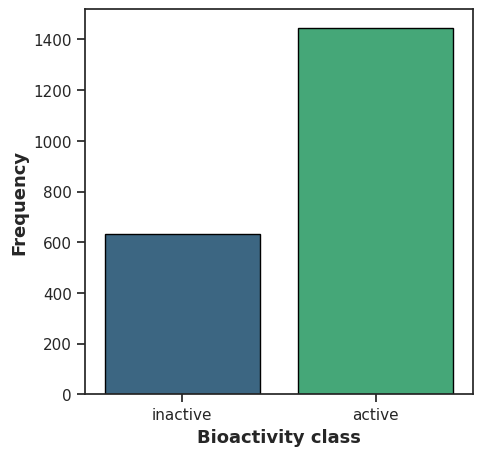

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
plt.figure(figsize=(5,5))
sns.countplot(x='bioactivity_class', hue='bioactivity_class', data=df_2class, edgecolor='black', palette='viridis', legend=False)
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
# Hiding the legend because it is unnecessary in this context
plt.legend([],[], frameon=False)
plt.savefig('plot_bioactivity_class.pdf')

#### Scatter plot of MW versus LogP

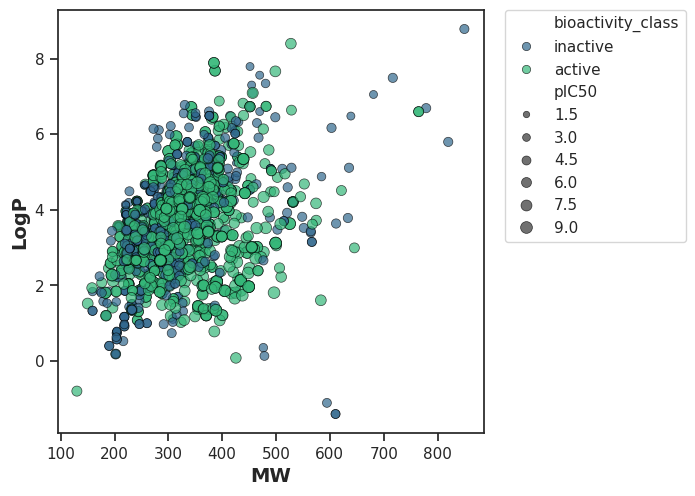

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class',palette='viridis', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

#### Boxplot of the pIC50 values distribution across two bioactivity classes

This visualization show how the median pIC50 values and their distributions differ across bioactivity classes, which can be insightful for identifying trends or outliers in compound efficacy

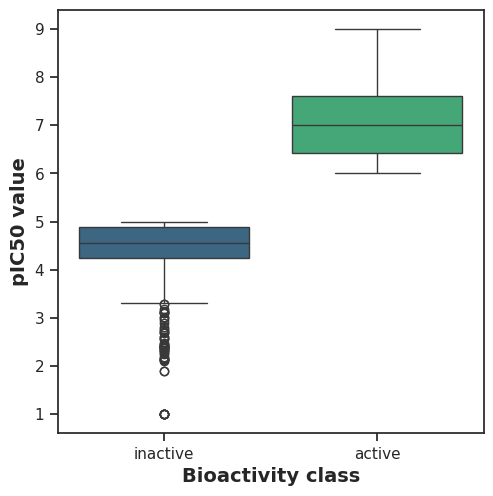

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', hue = 'bioactivity_class', y = 'pIC50', palette='viridis', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')

####Mann-Whitney U test
This function perform the Mann-Whitney U test between two groups - 'active' and 'inactive' compounds based on a given descriptor (for example pIC50).

In [ ]:
! pip install scipy
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):
    # Descriptors
    active = df_2class[df_2class.bioactivity_class == 'active'][descriptor]
    inactive = df_2class[df_2class.bioactivity_class == 'inactive'][descriptor]

    # U Mann-Whitney test
    stat, p = mannwhitneyu(active, inactive)

    # Interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'Interpretation': interpretation
    }, index=[0])

    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    if verbose:
        print(results)

    return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,913057.0,1.521317e-288,0.05,Different distribution (reject H0)


#### Visualisation ands statistical analyses for Lipinski descriptors (MW, LogP, NumHDonors, NumHAceptors)

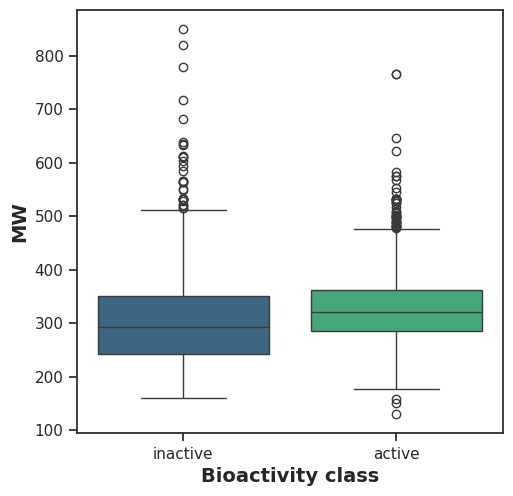

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', hue = 'bioactivity_class', y = 'MW', palette='viridis', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,540518.5,2.422829e-11,0.05,Different distribution (reject H0)


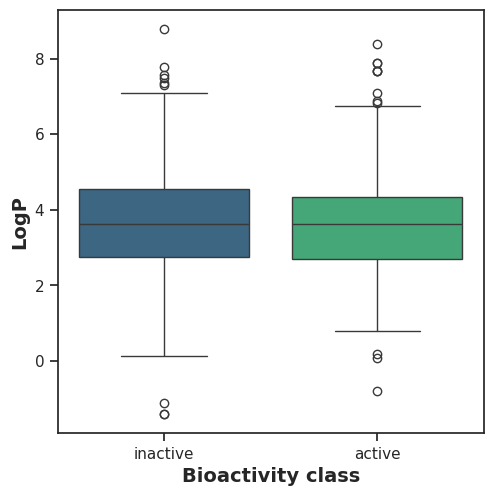

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', hue = 'bioactivity_class', y = 'LogP', palette='viridis', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,451577.5,0.693868,0.05,Same distribution (fail to reject H0)


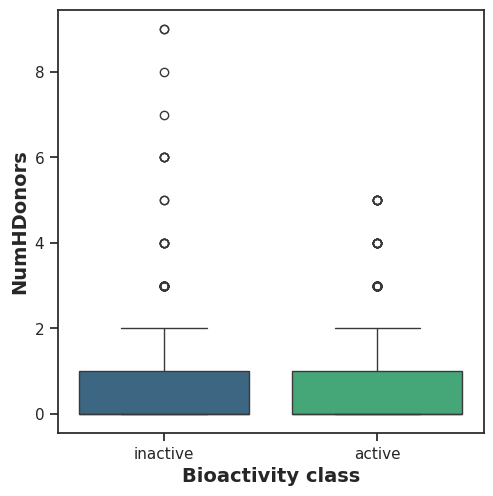

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', hue = 'bioactivity_class', y = 'NumHDonors', palette='viridis', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,409121.0,0.000015,0.05,Different distribution (reject H0)


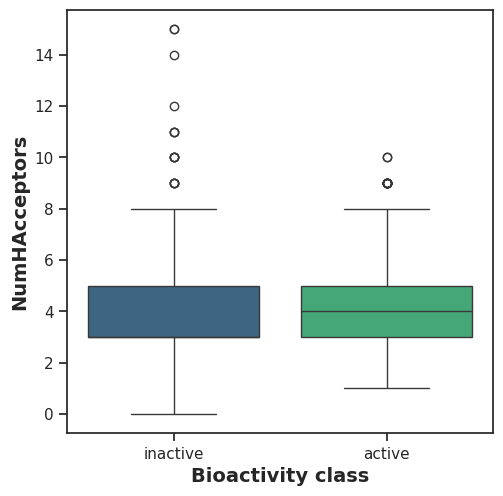

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', hue = 'bioactivity_class', y = 'NumHAcceptors', palette='viridis', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,532824.5,6.268815e-10,0.05,Different distribution (reject H0)


## Conculusions:
- pIC50 values shows statistically significant difference between actives and inactives, as expected
- Of the 4 Lipinski's descriptors, only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: cyp19a1_activity.csv (deflated 90%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: cyp19a1_data_preprocessed.csv (deflated 83%)


In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2,2,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2,2,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0,3,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0,3,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0,3,7.267606
...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,active,296.410,4.02950,0,2,7.300162
2886,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2,5,5.000000
2887,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1,7,7.508638
2888,CHEMBL5177928,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,active,299.355,2.40130,1,5,7.376751


### Calculate PaDEL descriptors


PaDEL-Descriptor is a software designed to calculate molecular descriptors and fingerprints. These descriptors are quantitative representations of molecular structures that can be used in machine learning models to predict biological activities, solubility, toxicity, and other chemical properties.
The .smi file format is simple and contains a list of molecules represented by their canonical SMILES strings, possibly alongside identifiers or other information, depending on the file's configuration.

In [ ]:
# Select columns relevant for analysis
selection = ['canonical_smiles', 'molecule_chembl_id']
df_final_selection=df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | wc -l

2890


In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-03-13 10:50:53--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-03-13 10:50:53--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2024-03-13 10:50:53 (165 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-03-13 10:50:53--  https://github

In [ ]:
! unzip -o padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
# Calculate PaDEL descriptors and save as descriptors_output.csv
! bash padel.sh

Processing CHEMBL341591 in molecule.smi (1/2890). 
Processing CHEMBL2111947 in molecule.smi (2/2890). 
Processing CHEMBL431859 in molecule.smi (3/2890). Average speed: 6.19 s/mol.
Processing CHEMBL113637 in molecule.smi (4/2890). Average speed: 3.27 s/mol.
Processing CHEMBL112021 in molecule.smi (5/2890). Average speed: 2.71 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2890). Average speed: 2.10 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2890). Average speed: 1.90 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2890). Average speed: 1.72 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2890). Average speed: 1.48 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2890). Average speed: 1.24 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2890). Average speed: 1.39 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2890). Average speed: 1.20 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2890). Average speed: 1.10 s/mol.
Processing CHEMBL166709 in molecule.smi (15/2890

In [ ]:
df_final_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df_final_X
# 'Pubchem__' columns are PubChem fingerprints; these are binary (0/1) features indicating the presence or absence of certain molecular substructures or properties
# 'Name' column is being dropped, likely to prepare the data for a machine learning model where only the numerical fingerprint data is needed

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,CHEMBL5184829,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final_X = df_final_X.drop(columns=['Name'])
df_final_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2886,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2887,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2888,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final_Y = df_final['pIC50']
df_final_Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2885    7.300162
2886    5.000000
2887    7.508638
2888    7.376751
2889    7.585027
Name: pIC50, Length: 2890, dtype: float64

In [ ]:
dataset_final = pd.concat([df_final_X, df_final_Y], axis=1)
dataset_final

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.300162
2886,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2887,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638
2888,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.376751


In [ ]:
dataset_final.to_csv('cyp19a1_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

##**Machine learning model bulding**
Regression Model using Random Forest

Creation of a regression model using RandomForest to predict the pIC50 value (Y variable).

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_model=pd.read_csv('cyp19a1_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df_model.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2886,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2887,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2888,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df_model.pIC50
Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2885    7.300162
2886    5.000000
2887    7.508638
2888    7.376751
2889    7.585027
Name: pIC50, Length: 2890, dtype: float64

**Remove low Variance Features**

By default, VarianceThreshold has a threshold of 0, which means that only features with the same value in all samples (i.e., their variance is 0) are removed. I use a threshold of .8 * (1 - .8). This expression is an example of calculating the threshold for binary features (0/1), where features are removed if the ratio of one of the values for a given feature is greater than 80% or less than 20%.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

**Data split 80/20 ratio**

The 80/20 ratio (or similar, e.g., 70/30, 75/25) is a popular choice in machine learning that allows for a balance between an adequate amount of data for training the model (80%) and a sufficient amount of data for its evaluation (20%).

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((2312, 152), (2312,))

In [ ]:
X_test.shape, Y_test.shape

((578, 152), (578,))

**Regression Model using Random Forest**

In [ ]:
# Create a Random Forest Regressor model with 100 estimators (tress)
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
# Train a model and evaluate the model's performance
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.38009197997280353

In [ ]:
# Make a predictions on the test set
Y_pred = model.predict(X_test)

**Scatter Plot of Experimental vs Predicted pIC50 Values**

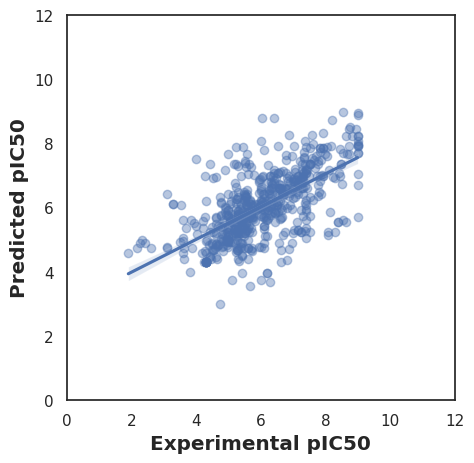

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

plt.show()



####Compare ML models
Comparison of several regression models using the lazypredict library in Python.

**lazypredict**
is a Python library designed for automating the process of selecting and evaluating machine learning models

In [ ]:
!pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Split the data into training and testing sets
# https://analyticsindiamag.com/visualizing-and-comparing-ml-models-using-lazypredict/
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Use LazyRegressor for training and testing set
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:36<00:00,  2.11it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2312, number of used features: 152
[LightGBM] [Info] Start training from score 6.065327


100%|██████████| 42/42 [00:36<00:00,  1.14it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:33<00:00,  2.03it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2312, number of used features: 152
[LightGBM] [Info] Start training from score 6.065327


100%|██████████| 42/42 [00:34<00:00,  1.23it/s]


In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.69,0.71,0.74,0.12
ExtraTreesRegressor,0.69,0.71,0.74,2.86
DecisionTreeRegressor,0.69,0.71,0.74,0.17
GaussianProcessRegressor,0.69,0.71,0.74,2.45
XGBRegressor,0.68,0.70,0.75,0.33
RandomForestRegressor,0.66,0.68,0.76,2.39
BaggingRegressor,0.65,0.67,0.78,0.44
MLPRegressor,0.61,0.64,0.82,4.33
HistGradientBoostingRegressor,0.59,0.61,0.84,3.15


In [ ]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.69,0.71,0.74,0.12
ExtraTreesRegressor,0.69,0.71,0.74,2.86
DecisionTreeRegressor,0.69,0.71,0.74,0.17
GaussianProcessRegressor,0.69,0.71,0.74,2.45
XGBRegressor,0.68,0.70,0.75,0.33
RandomForestRegressor,0.66,0.68,0.76,2.39
BaggingRegressor,0.65,0.67,0.78,0.44
MLPRegressor,0.61,0.64,0.82,4.33
HistGradientBoostingRegressor,0.59,0.61,0.84,3.15


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.32,0.50,0.96,1.26
RandomForestRegressor,0.32,0.50,0.96,2.57
LGBMRegressor,0.31,0.49,0.97,0.43
XGBRegressor,0.30,0.48,0.97,0.32
BaggingRegressor,0.29,0.48,0.98,0.27
MLPRegressor,0.29,0.47,0.98,3.65
SVR,0.28,0.47,0.99,1.28
NuSVR,0.28,0.47,0.99,0.65
GradientBoostingRegressor,0.27,0.46,1.00,1.10


In [ ]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.32,0.50,0.96,1.26
RandomForestRegressor,0.32,0.50,0.96,2.57
LGBMRegressor,0.31,0.49,0.97,0.43
XGBRegressor,0.30,0.48,0.97,0.32
BaggingRegressor,0.29,0.48,0.98,0.27
MLPRegressor,0.29,0.47,0.98,3.65
SVR,0.28,0.47,0.99,1.28
NuSVR,0.28,0.47,0.99,0.65
GradientBoostingRegressor,0.27,0.46,1.00,1.10


[(0.0, 1.0)]

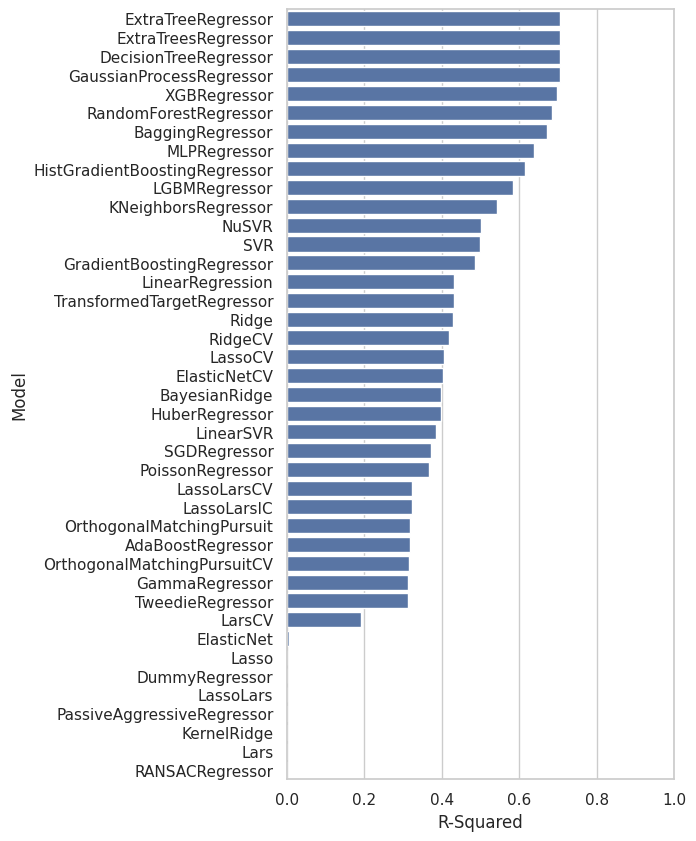

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

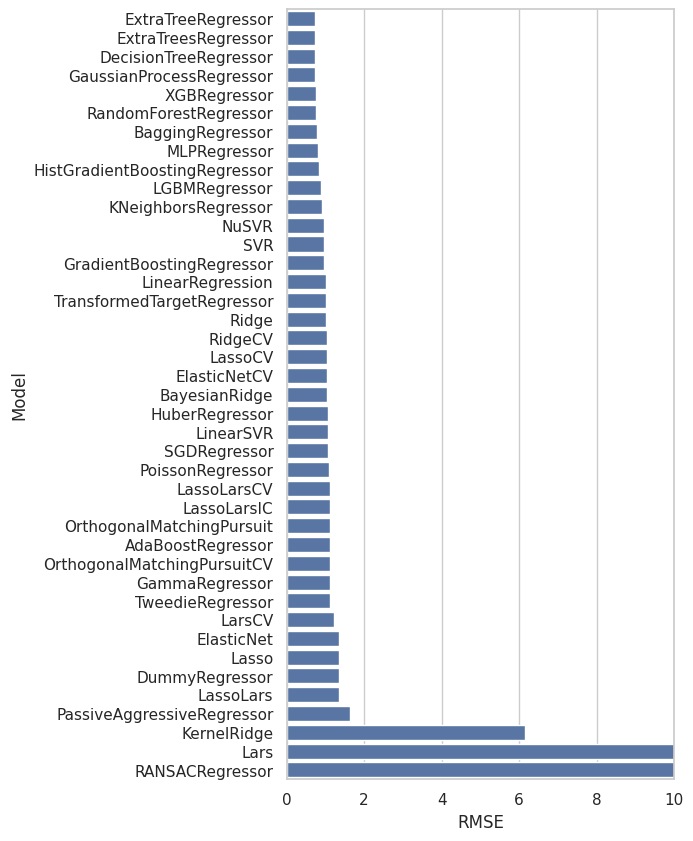

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

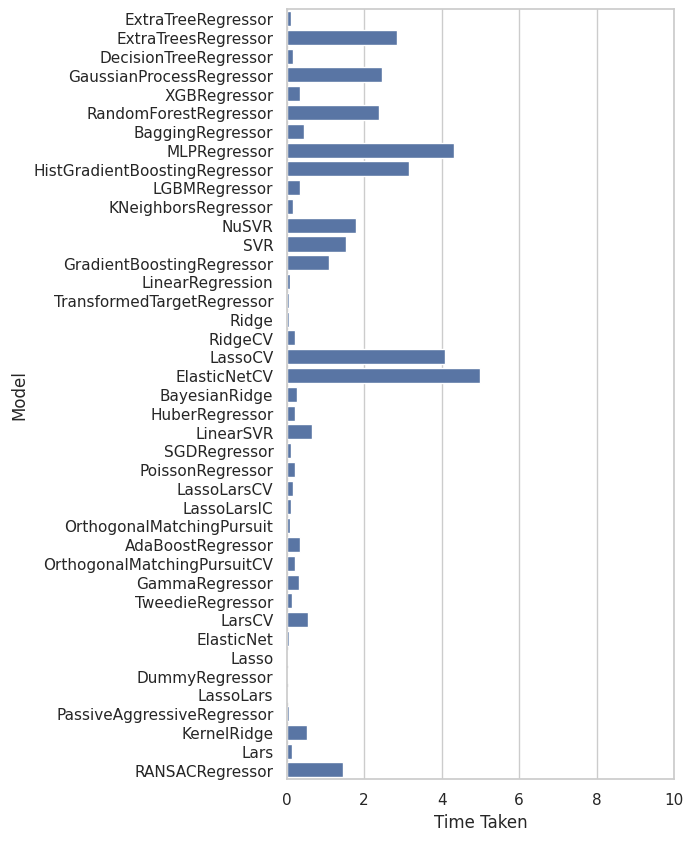

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))